This notebook looks at the local, daily high and low temperatures and precipitation amounts since 1990 through 2023 that my father has manually collected. Initially I was looking to use this information to make a prediction model, but realized that more features are needed for such modeling to take place. I feel as though it is insightful to show the data nevertheless. Enjoy!!

The following few code cells show the inported excel file, info about each column of the excel file, and some other statistics that could be useful, such as mean and the quartile ranges of the data.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('weather_data.xlsx')
df.head()

,date,high_temp,low_temp,precipitation (in inches)
0,1988-01-01,NaN,NaN,0.0
1,1988-01-02,NaN,NaN,0.0
2,1988-01-03,NaN,NaN,0.0
3,1988-01-04,NaN,NaN,0.0
4,1988-01-05,NaN,NaN,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       13149 non-null  datetime64[ns]
 1   high_temp                  12955 non-null  float64       
 2   low_temp                   10612 non-null  float64       
 3   precipitation (in inches)  12997 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 411.0 KB


In [18]:
df.describe()

,date,high_temp,low_temp,precipitation (in inches)
count,13149,12955.000000,10612.000000,12997.000000
mean,2005-12-30 23:59:59.999999872,60.883597,40.854599,0.116359
min,1988-01-01 00:00:00,-29.000000,-24.000000,0.000000
25%,1996-12-31 00:00:00,43.000000,27.000000,0.000000
50%,2005-12-31 00:00:00,64.000000,41.000000,0.000000
75%,2014-12-31 00:00:00,80.000000,58.000000,0.000000
max,2023-12-31 00:00:00,104.000000,83.000000,6.000000
std,NaN,22.046347,19.808885,0.361791


In [19]:
df.isna().sum()

date                            0
high_temp                     194
low_temp                     2537
precipitation (in inches)     152
dtype: int64

Data Visualization

The pairplot below shows the relation between the features in the dataset. The upper, middle graph for example shows the positive correlation between high_temp vs low_temp, whereas the bottom, left graph shows the clustering of precipitation amounts around the 60 degree mark of the high_temp column with some outliers above the 3 inch mount. Those outliers can be seen more viscerally in the bottom, right graph with the barplot showing a right skewed distribution (meaning that for most of the time there was no significant precipitation to be measured).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


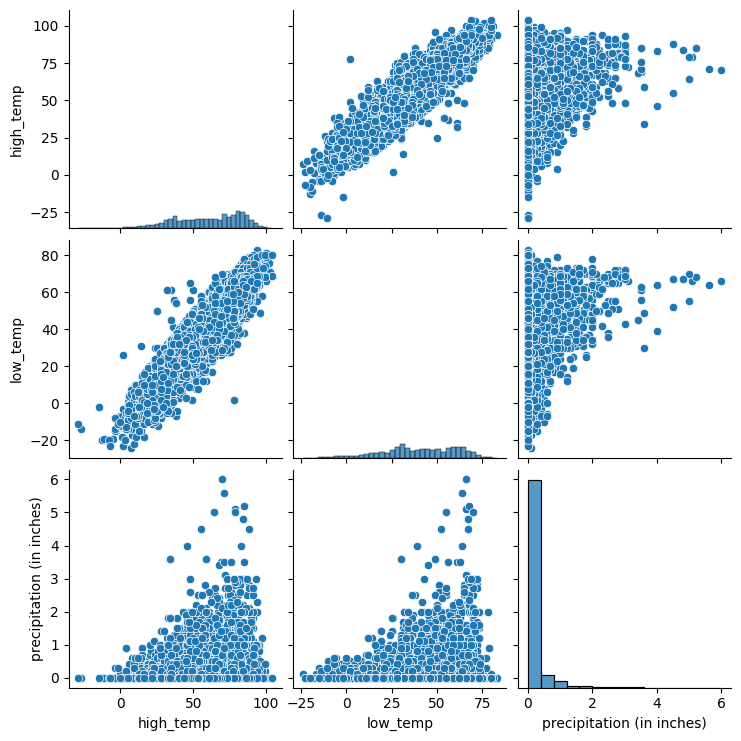

In [20]:
sns.pairplot(data=df)

This next plot shows a distribution of the high and low temperature with few outliers on the lower end for both features.

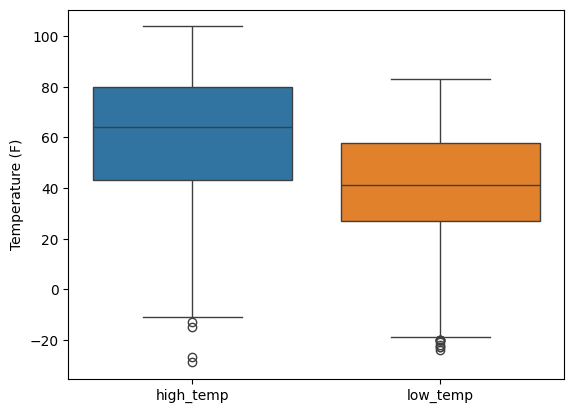

In [21]:
sns.boxplot(data=df[['high_temp', 'low_temp']])
plt.ylabel('Temperature (F)')
plt.show()

Like I mentioned above, the distribution of the precipitation amounts are fight skewed and that is shown again in this boxplot.

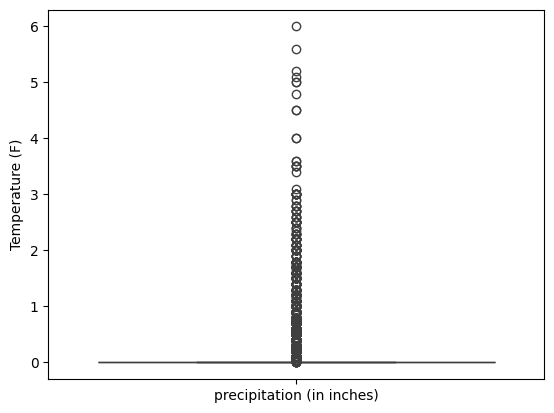

In [22]:
sns.boxplot(data=df[['precipitation (in inches)']])
plt.ylabel('Temperature (F)')
plt.show()

The mean temperature of the month of December is calculated for the sole purpose of showing how we could fill in missing data points with the mean temperature.

In [23]:
'''
example of accessing a specific month on the chance that I will use a total month to
fill in NaN values with mean for example
'''
december = df[df['date'].dt.month == 12].high_temp.mean()
round(december)

36

Below is the visualization of the high and low temperature with the precipitation amounts from 1991 through 2023

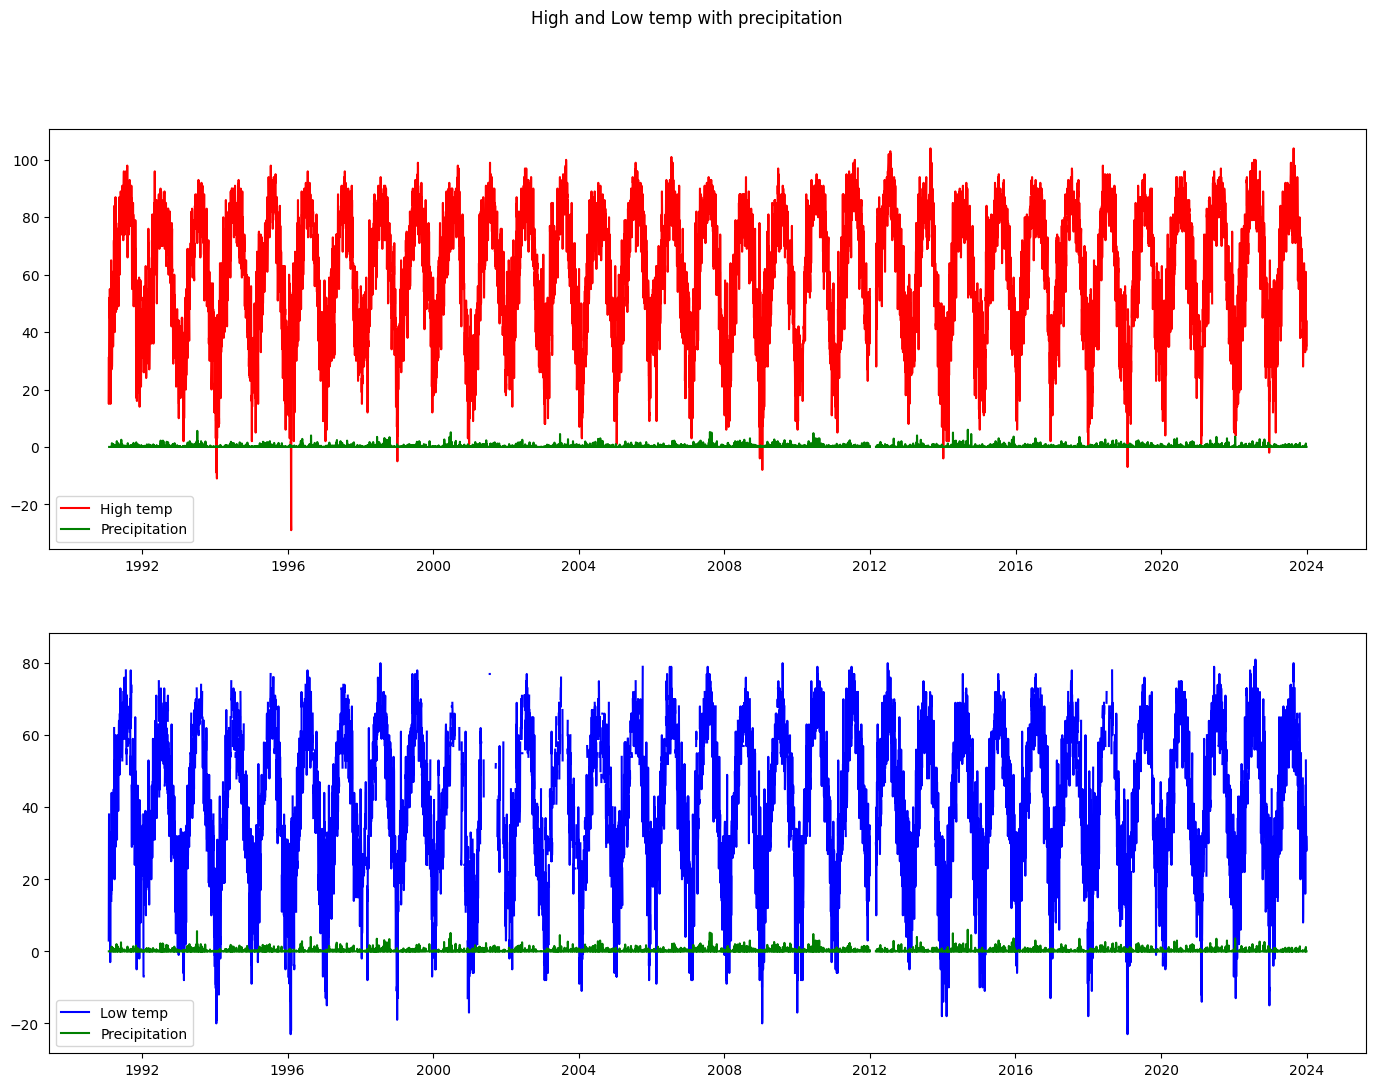

In [28]:
###### plotting high_temp and low_temp with precipitation to visualize the peaks and troughs
df_1991_to_present = df[df['date'] >= '1991-01-01']

fig, ax = plt.subplots(2, figsize=(17, 12))

ax[0].plot(df_1991_to_present['date'], df_1991_to_present['high_temp'], label='High temp', color='red')
ax[0].plot(df_1991_to_present['date'], df_1991_to_present['precipitation (in inches)'], label='Precipitation', color='green')
ax[1].plot(df_1991_to_present['date'], df_1991_to_present['low_temp'], label='Low temp', color='blue')
ax[1].plot(df_1991_to_present['date'], df_1991_to_present['precipitation (in inches)'], label='Precipitation', color='green')
fig.suptitle('High and Low temp with precipitation')
ax[0].legend()
ax[1].legend()
plt.show()

In [27]:
df_1991_to_present.isna().sum()

date                            0
high_temp                     104
low_temp                     1609
precipitation (in inches)      93
dtype: int64